# Team Competition

In [ ]:
pip install --force-reinstall xgboost==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127.6 MB 5.9 kB/s 
     |████████████████████████████████| 38.1 MB 23.7 MB/s 
     |████████████████████████████████| 15.7 MB 172 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 5.1 MB/s 
     |████████████████████████████████| 106 kB 54.1 MB/s 
     |████████████████████████████████| 79.9 MB 87 kB/s 
     |████████████████████████████████| 3.3 MB 32.3 MB/s 
     |████████████████████████████████| 280 kB 43.6 MB/s 
     |████████████████████████████████| 72 kB 706 kB/s 
     |████████████████████████████████| 44 kB 2.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 46.4 MB/s 
     |████████████████████████████████| 7.0 MB 6.4 MB/s 
     |████████████████████████████████| 1.4 MB 55.8 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 11.2 MB 35.4 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |█████████████████████████

In [ ]:
# import the pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.tsa.stattools import kpss as KPSS
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox as box
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  mean_absolute_percentage_error
import seaborn as sns
import itertools
from statsmodels.tsa.stattools import arma_order_select_ic as ORDER
from plotnine import * 
from statsmodels.tsa.api import ExponentialSmoothing as es
import statsmodels.formula.api as smf
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.linear_model import LassoLars
import xgboost
from sklearn.ensemble import VotingRegressor
import lightgbm as lgb
from pycaret.time_series import *
%matplotlib inline

In [ ]:
# Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Shawn-zou-2020/MyProjects/main/Timeseries%20Analysis/Datasets/CompetitionData.csv')
df.head()

,Date,Temperature,Load,Prediction
0,1/1/08 01:00,25.0,10737.0,NaN
1,1/1/08 02:00,24.0,10348.0,NaN
2,1/1/08 03:00,23.0,9997.0,NaN
3,1/1/08 04:00,23.0,9760.0,NaN
4,1/1/08 05:00,23.0,9624.0,NaN


In [ ]:
# Data preprocess
df['Date'] = pd.to_datetime(df['Date'] )
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YM'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
df['Day'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df['Dow'] = df['Date'].dt.day_of_week+1
df['Doy'] = df['Date'].dt.dayofyear
df['Dom'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['T2'] = [i**2 for i in df['Temperature']]
df.head()

,Date,Temperature,Load,Prediction,Year,Month,YM,Day,Dow,Doy,Dom,Hour,T2
0,2008-01-01 01:00:00,25.0,10737.0,NaN,2008,1,2008-01,2008-01-01,2,1,1,1,625.0
1,2008-01-01 02:00:00,24.0,10348.0,NaN,2008,1,2008-01,2008-01-01,2,1,1,2,576.0
2,2008-01-01 03:00:00,23.0,9997.0,NaN,2008,1,2008-01,2008-01-01,2,1,1,3,529.0
3,2008-01-01 04:00:00,23.0,9760.0,NaN,2008,1,2008-01,2008-01-01,2,1,1,4,529.0
4,2008-01-01 05:00:00,23.0,9624.0,NaN,2008,1,2008-01,2008-01-01,2,1,1,5,529.0


In [ ]:
# His
His = df.copy()

In [ ]:
# His preprocess
His['Time'] = list(range(1,len(His)+1))

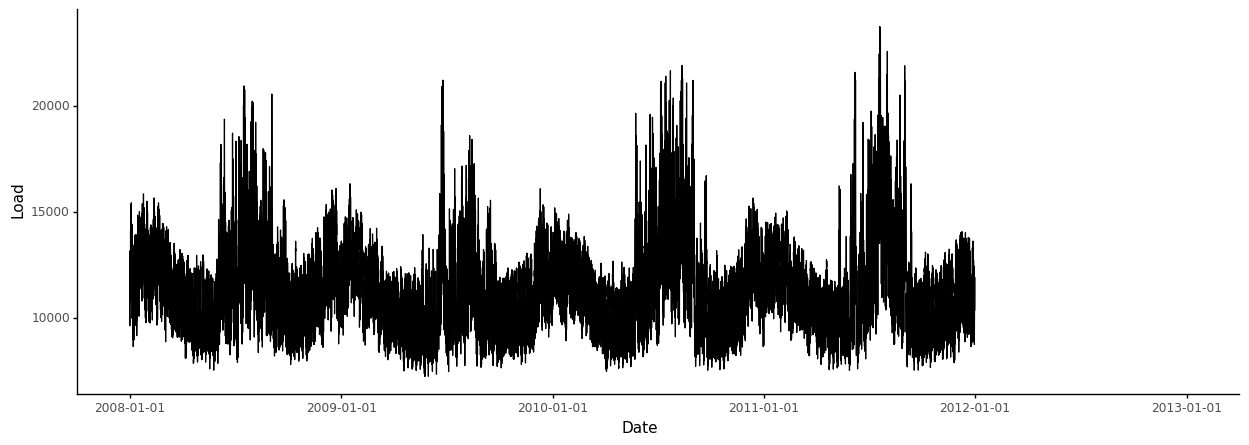

<ggplot: (8781274234077)>

In [ ]:
(ggplot(His,aes('Date','Load'))
+ geom_line()
+ theme_classic()
+ theme(figure_size=(15,5)))

<AxesSubplot:xlabel='Doy'>

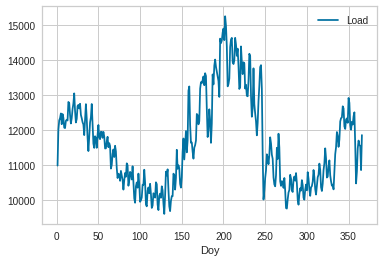

In [ ]:
His_d = His[['Load']].groupby(His['Doy']).mean()
His_d.plot()

<AxesSubplot:xlabel='Hour'>

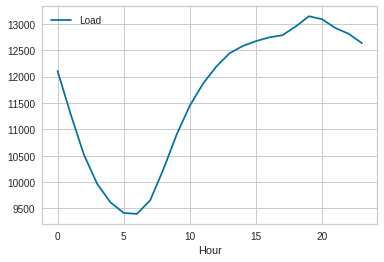

In [ ]:
His_h = His[['Load']].groupby(His['Hour']).mean()
His_h.plot()

<AxesSubplot:xlabel='Dow'>

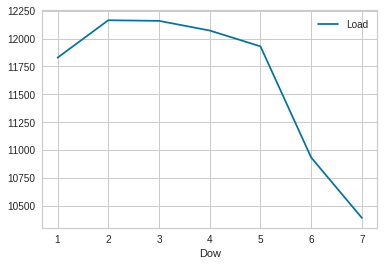

In [ ]:
His_dow = His[['Load']].groupby(His['Dow']).mean()
His_dow.plot()

<AxesSubplot:xlabel='Month'>

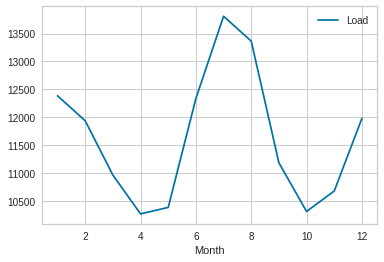

In [ ]:
His_m = His[['Load']].groupby(His['Month']).mean()
His_m.plot()

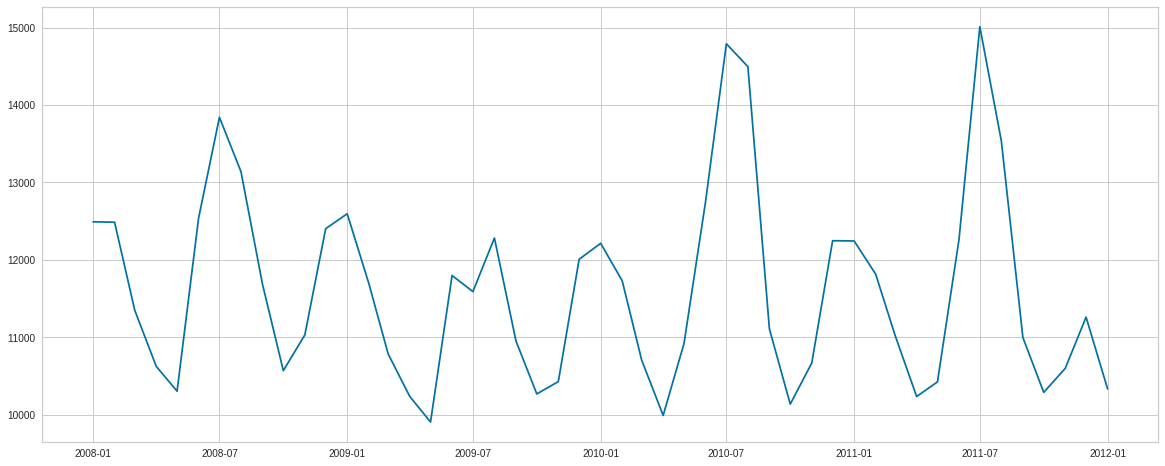

In [ ]:
His_ym = His[['Load']].groupby(His['YM']).mean()
His_ym = His_ym.reset_index()
His_ym['YM'] = pd.to_datetime(His_ym['YM'])
plt.figure(figsize=(20,8))
plt.plot('YM','Load',data=His_ym)


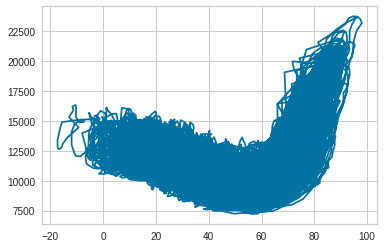

In [ ]:
plt.plot('Temperature','Load',data=His)
# So we add Temperature^2 AS T2 

In [ ]:
His.tail()

,Date,Temperature,Load,Prediction,Year,Month,YM,Day,Dow,Doy,Dom,Hour,T2,Time
43843,2012-12-31 20:00:00,22.33,NaN,NaN,2012,12,2012-12,2012-12-31,1,366,31,20,498.6289,43844
43844,2012-12-31 21:00:00,20.67,NaN,NaN,2012,12,2012-12,2012-12-31,1,366,31,21,427.2489,43845
43845,2012-12-31 22:00:00,19.67,NaN,NaN,2012,12,2012-12,2012-12-31,1,366,31,22,386.9089,43846
43846,2012-12-31 23:00:00,19.33,NaN,NaN,2012,12,2012-12,2012-12-31,1,366,31,23,373.6489,43847
43847,2013-01-01 00:00:00,18.33,NaN,NaN,2013,1,2013-01,2013-01-01,2,1,1,0,335.9889,43848


In [ ]:
# Regression
m0 = smf.ols('Load ~ Time + Temperature + C(Dow)*C(Month)*C(Hour) + T2', His).fit()
m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     104.3
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:11:54   Log-Likelihood:            -2.8642e+05
No. Observations:               35064   AIC:                         5.769e+05
Df Residuals:                   33045   BIC:                         5.940e+05
Df Model:                        2018                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 1.404e+04    214.234     65.534      0.000    1.36e+04    1.45e+04
C(Dow)[T.2]                                988.3765    306.291      3.227      0.001     388.036    1588.717
C(Dow)[T.3]                                722.9878    301.596      2.397      0.017     131.849    1314.127
C(Dow)[T.4]                                787.9307    297.379      2.650      0.008     205.058    1370.804
C(Dow)[T.5]                                688.2997    297.382      2.315      0.021     105.420    1271.180
C(Dow)[T.6]                                668.2445    293.548      2.276      0.023      92.879    1243.610
C(Dow)[T.7]                                 19.4808    293.549      0.066      0.947    -555.886     594.848
C(Month)[T.2]                              126.6168    306.305      0.413      0.679    -473.752     726.986
C(Month)[T.3]                              123.5364    293.773      0.421      0.674    -452.270     699.342
C(Month)[T.4]                             -806.7101    306.789     -2.630      0.009   -1408.027    -205.393
C(Month)[T.5]                             -791.1782    298.070     -2.654      0.008   -1375.406    -206.951
C(Month)[T.6]                               67.6371    298.381      0.227      0.821    -517.200     652.474
C(Month)[T.7]                             1116.2165    307.558      3.629      0.000     513.393    1719.040
C(Month)[T.8]                              988.9565    294.739      3.355      0.001     411.258    1566.655
C(Month)[T.9]                             -777.3986    302.502     -2.570      0.010   -1370.313    -184.485
C(Month)[T.10]                            -698.8480    302.191     -2.313      0.021   -1291.153    -106.543
C(Month)[T.11]                            -671.8064    297.770     -2.256      0.024   -1255.446     -88.167
C(Month)[T.12]                             418.2943    301.635      1.387      0.166    -172.921    1009.509
C(Hour)[T.1]                              -570.6462    301.591     -1.892      0.058   -1161.776      20.484
C(Hour)[T.2]                              -971.2764    301.591     -3.221      0.001   -1562.406    -380.147
C(Hour)[T.3]                             -1148.6811    301.592     -3.809      0.000   -1739.811    -557.551
C(Hour)[T.4]                             -1258.4935    301.591     -4.173      0.000   -1849.623    -667.364
C(Hour)[T.5]                             -1223.3537    301.591     -4.056      0.000   -1814.484    -632.224
C(Hour)[T.6]                              -964.9473    301.591     -3.200      0.001   -1556.077    -373.817
C(Hour)[T.7]                              -279.2794    301.591     -0.926      0.354    -870.409     311.851
C(Hour)[T.8]                   

In [ ]:
His['m0']=m0.fittedvalues
His['m0res']=m0.resid

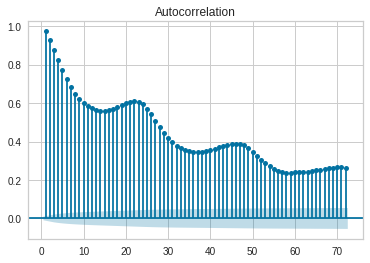

In [ ]:
plot_acf(His['m0res'],lags=72, missing='drop',zero=False);

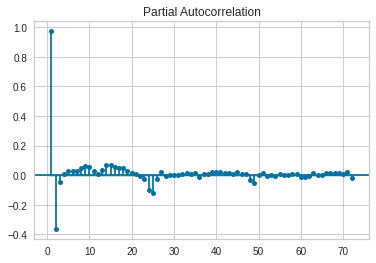

In [ ]:
plot_pacf(His.m0res[His.m0res.notna()],lags=72, zero=False);

In [ ]:
His['lag24'] = His['Load'].shift(24)
His['lag23'] = His['Load'].shift(23)
His['lag2'] = His['Load'].shift(2)
His['lag1'] = His['Load'].shift(1)

In [ ]:
# Regression
m1 = smf.ols('Load ~ Time + Temperature + C(Dow)*C(Month)*C(Hour) + T2 + lag24 + lag23 + lag1 + lag2', His).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8205.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:03:38   Log-Likelihood:            -2.1222e+05
No. Observations:               35040   AIC:                         4.285e+05
Df Residuals:                   33017   BIC:                         4.456e+05
Df Model:                        2022                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  189.4660     27.635      6.856      0.000     135.300     243.632
C(Dow)[T.2]                                -81.8064     37.091     -2.206      0.027    -154.506      -9.107
C(Dow)[T.3]                                -63.1561     37.090     -1.703      0.089    -135.853       9.541
C(Dow)[T.4]                                -64.8598     36.009     -1.801      0.072    -135.438       5.719
C(Dow)[T.5]                                -42.4484     36.006     -1.179      0.238    -113.022      28.125
C(Dow)[T.6]                                 -4.4142     35.537     -0.124      0.901     -74.067      65.239
C(Dow)[T.7]                                 50.7916     35.531      1.430      0.153     -18.850     120.434
C(Month)[T.2]                               56.7073     37.071      1.530      0.126     -15.953     129.368
C(Month)[T.3]                               30.9358     35.586      0.869      0.385     -38.814     100.686
C(Month)[T.4]                             -138.9949     37.243     -3.732      0.000    -211.992     -65.998
C(Month)[T.5]                              -68.5792     36.240     -1.892      0.058    -139.612       2.453
C(Month)[T.6]                              356.1547     36.168      9.847      0.000     285.265     427.045
C(Month)[T.7]                              374.6236     37.249     10.057      0.000     301.614     447.634
C(Month)[T.8]                               -0.2727     35.747     -0.008      0.994     -70.339      69.793
C(Month)[T.9]                               -3.3222     36.636     -0.091      0.928     -75.130      68.485
C(Month)[T.10]                             116.9971     36.586      3.198      0.001      45.288     188.706
C(Month)[T.11]                              28.4470     36.041      0.789      0.430     -42.195      99.089
C(Month)[T.12]                             -19.1420     36.509     -0.524      0.600     -90.700      52.416
C(Hour)[T.1]                               135.2935     36.518      3.705      0.000      63.717     206.870
C(Hour)[T.2]                               277.7365     36.538      7.601      0.000     206.122     349.351
C(Hour)[T.3]                               314.6867     36.546      8.611      0.000     243.055     386.318
C(Hour)[T.4]                               258.1178     36.565      7.059      0.000     186.449     329.787
C(Hour)[T.5]                               317.6413     36.590      8.681      0.000     245.923     389.359
C(Hour)[T.6]                               435.3290     36.633     11.883      0.000     363.526     507.132
C(Hour)[T.7]                               725.0720     36.703     19.755      0.000     653.133     797.011
C(Hour)[T.8]                   

<AxesSubplot:>

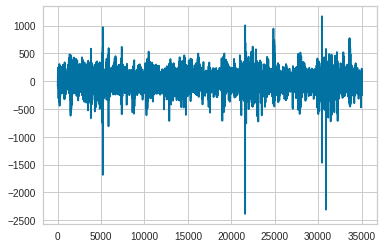

In [ ]:
His['m1']=m1.fittedvalues
His['m1res']=m1.resid
His['m1res'].plot()

In [ ]:
ADF(His['m1res'].dropna())[1]

0.0

In [ ]:
KPSS(His['m1res'].dropna())[1]
# 0.1>0.05, so it is stationary

0.03836096483983909

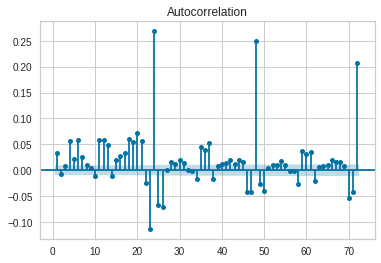

In [ ]:
plot_acf(His['m1res'],lags=72, missing='drop',zero=False);

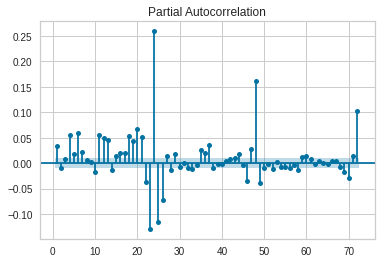

In [ ]:
plot_pacf(His.m1res[His.m1res.notna()],lags=72, zero=False);

In [ ]:
def mape(y_true,y_pred):
    return round(100*np.mean(np.abs(y_true - y_pred)/(np.abs(y_true))),3)

In [ ]:
mape(His['Load'],His['m1'])

0.591

# Deal with m1res - Try to add special event - Nah

In [ ]:
His['DH'] = [str(i)+'-'+str(j) for i,j in zip(His['Day'], His['Hour'])]

In [ ]:
event1 = His.loc[His['m1res']<-1000,['m1res','DH']].sort_values(by='m1res', ascending=True)
event_1 =list(event1['DH'].values)

In [ ]:
event2 = His.loc[His['m1res']>1000,['m1res','DH']].sort_values(by='m1res', ascending=False)
event_2 =list(event2['DH'].values)
event_l = list(set(event_1+event_2))

In [ ]:
His['Event'] = [1 if i in event_l else 0 for i in His['DH']]

In [ ]:
m3 = smf.ols('Load ~ Time + Temperature + C(Dow)*C(Hour) + C(Month) + C(Year) + T2 + lag24 + lag23 + lag1 + lag2 + Event', His).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.883e+04
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:03:50   Log-Likelihood:            -2.2732e+05
No. Observations:               35040   AIC:                         4.550e+05
Df Residuals:                   34849   BIC:                         4.566e+05
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   492.2072     17.722     27.773      0.000     457.471     526.944
C(Dow)[T.2]                 -45.3843     15.717     -2.888      0.004     -76.190     -14.579
C(Dow)[T.3]                   5.6889     15.693      0.363      0.717     -25.071      36.448
C(Dow)[T.4]                  20.8941     15.669      1.333      0.182      -9.817      51.605
C(Dow)[T.5]                  31.8418     15.662      2.033      0.042       1.144      62.540
C(Dow)[T.6]                  91.3004     15.649      5.834      0.000      60.628     121.972
C(Dow)[T.7]                  63.1179     15.656      4.031      0.000      32.431      93.805
C(Hour)[T.1]                -94.6754     15.660     -6.046      0.000    -125.370     -63.981
C(Hour)[T.2]                 -6.3421     15.764     -0.402      0.687     -37.239      24.555
C(Hour)[T.3]                100.6578     15.819      6.363      0.000      69.652     131.663
C(Hour)[T.4]                 97.4520     15.802      6.167      0.000      66.480     128.424
C(Hour)[T.5]                 94.4944     15.806      5.978      0.000      63.513     125.476
C(Hour)[T.6]                157.0882     15.827      9.925      0.000     126.066     188.110
C(Hour)[T.7]                356.6360     15.836     22.521      0.000     325.597     387.675
C(Hour)[T.8]                601.1990     15.861     37.904      0.000     570.111     632.287
C(Hour)[T.9]                424.4531     16.095     26.371      0.000     392.906     456.000
C(Hour)[T.10]               175.7673     16.255     10.813      0.000     143.907     207.628
C(Hour)[T.11]                95.3387     16.186      5.890      0.000      63.615     127.063
C(Hour)[T.12]               159.1973     16.082      9.899      0.000     127.676     190.718
C(Hour)[T.13]               188.4896     16.022     11.765      0.000     157.086     219.893
C(Hour)[T.14]               142.2903     15.981      8.904      0.000     110.966     173.614
C(Hour)[T.15]               199.3011     15.949     12.496      0.000     168.040     230.562
C(Hour)[T.16]               199.2022     15.961     12.481      0.000     167.918     230.486
C(Hour)[T.17]               102.5855     16.053      6.390      0.000      71.121     134.050
C(Hour)[T.18]               212.8239     16.080     13.235      0.000     181.306     244.342
C(Hour)[T.19]               264.9165     15.945     16.615      0.000     233.664     296.169
C(Hour)[T.20]                34.2256     15.933      2.148      0.032       2.997      65.454
C(Hour)[T.21]                73.5907     15.932      4.619      0.000      42.363     104.819
C(Hour)[T.22]               218.7893     15.893     13.767      0.000     187.639     249.939
C(Hour)[T.23]               190.8359     15.762     12.107      0.000     1

In [ ]:
m2 = smf.ols('Load ~ Time + Temperature + C(Dow)*C(Month)*C(Hour) + C(Doy) + C(Dom) + T2 + lag24 + lag23 + lag1 + lag2 + Event', His).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8329.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:05:10   Log-Likelihood:            -2.1195e+05
No. Observations:               35040   AIC:                         4.279e+05
Df Residuals:                   33016   BIC:                         4.451e+05
Df Model:                        2023                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  182.2634     27.423      6.646      0.000     128.513     236.014
C(Dow)[T.2]                                -84.1062     36.804     -2.285      0.022    -156.243     -11.970
C(Dow)[T.3]                                -64.5901     36.803     -1.755      0.079    -136.724       7.544
C(Dow)[T.4]                                -66.2476     35.730     -1.854      0.064    -136.280       3.785
C(Dow)[T.5]                                -43.6582     35.728     -1.222      0.222    -113.686      26.369
C(Dow)[T.6]                                 -4.4169     35.262     -0.125      0.900     -73.531      64.697
C(Dow)[T.7]                                 51.7254     35.256      1.467      0.142     -17.378     120.828
C(Month)[T.2]                               57.2049     36.784      1.555      0.120     -14.893     129.303
C(Month)[T.3]                               34.2191     35.311      0.969      0.333     -34.991     103.430
C(Month)[T.4]                             -132.2014     36.955     -3.577      0.000    -204.635     -59.767
C(Month)[T.5]                              -60.2898     35.962     -1.677      0.094    -130.776      10.196
C(Month)[T.6]                              360.9979     35.888     10.059      0.000     290.655     431.340
C(Month)[T.7]                              377.4245     36.961     10.211      0.000     304.980     449.869
C(Month)[T.8]                                4.6804     35.471      0.132      0.895     -64.844      74.205
C(Month)[T.9]                                0.1450     36.352      0.004      0.997     -71.107      71.397
C(Month)[T.10]                             119.0015     36.303      3.278      0.001      47.847     190.156
C(Month)[T.11]                              28.8504     35.762      0.807      0.420     -41.245      98.946
C(Month)[T.12]                             -18.9852     36.226     -0.524      0.600     -89.990      52.019
C(Hour)[T.1]                               133.0646     36.235      3.672      0.000      62.042     204.087
C(Hour)[T.2]                               275.4924     36.255      7.599      0.000     204.432     346.553
C(Hour)[T.3]                               314.0900     36.263      8.661      0.000     243.013     385.167
C(Hour)[T.4]                               259.1620     36.282      7.143      0.000     188.048     330.276
C(Hour)[T.5]                               319.3246     36.307      8.795      0.000     248.161     390.488
C(Hour)[T.6]                               437.8834     36.350     12.046      0.000     366.636     509.131
C(Hour)[T.7]                               729.1784     36.419     20.022      0.000     657.795     800.562
C(Hour)[T.8]                   

<AxesSubplot:>

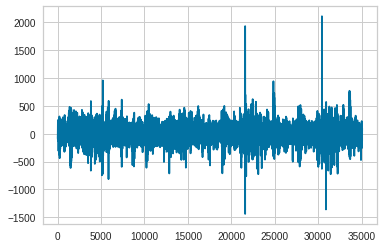

In [ ]:
His['m2']=m2.fittedvalues
His['m2res']=m2.resid
His['m2res'].plot()

In [ ]:
mape(His['Load'],His['m2'])

0.59

<AxesSubplot:>

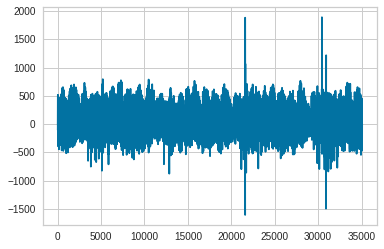

In [ ]:
His['m3']=m3.fittedvalues
His['m3res']=m3.resid
His['m3res'].plot()

In [ ]:
mape(His['Load'],His['m3'])

0.943

# Pycaret - Nah

In [ ]:
# Hour = His.reset_index()
# Hour = Hour.set_index('Hour')
# Hour = Hour[['m2res']].grouby('Hour').mean()

In [ ]:
# sumres = sum([abs(i) for i in Hour['m2res']])
# Hour['p'] = [i/sumres for i in Hour['m2res']]
# hour_dict = dict(zip(Hour.index,Hour['p']))

In [ ]:
# day = His.reset_index()
# day['Day'] = pd.to_datetime(day['Day'])
# day = day.set_index('Day')
# day = day[['m2res','Year','Dow','Month','Doy','Dom','Temperature','T2','Time']].groupby('Day').mean()
# day = day.dropna()

In [ ]:
# s = setup(data = day, target='m2res', fold = 3,fh =24, session_id = 123)

In [ ]:
# M = compare_models(sort='mape')

In [ ]:
# M

# Feature Engineering & Selection & ML Packages

In [ ]:
def accuracy(train_a,train_p):
    
    metrics = pd.DataFrame(columns=['RMSE','MAPE(%)'], index=['Training'])

    metrics = pd.DataFrame(columns=['RMSE','MAPE(%)'], index=['Training'])
    metrics.loc['Training','RMSE'] = (((train_a - train_p)**2).mean())**0.5
    metrics.loc['Training','MAPE(%)'] = (abs((train_a - train_p)/train_a)).mean()*100
    
    return metrics

In [ ]:
# Create fearures
# basic math
list1 = ['Month','Hour','Time', 'Dow']
list2 = ['Temperature', 'T2']

for i in list1:
    His[i+'_1/2'] = [n**0.5 for n in His[i]]
    His[i+'2'] = [n**2 for n in His[i]]

His['T3'] = [n**3 for n in His['Temperature']]
His.head()

,Date,Temperature,Load,Prediction,Year,Month,YM,Day,Dow,Doy,...,m3res,Month_1/2,Month2,Hour_1/2,Hour2,Time_1/2,Time2,Dow_1/2,Dow2,T3
0,2008-01-01 01:00:00,25.0,10737.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,NaN,1.0,1,1.000000,1,1.000000,1,1.414214,4,15625.0
1,2008-01-01 02:00:00,24.0,10348.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,NaN,1.0,1,1.414214,4,1.414214,4,1.414214,4,13824.0
2,2008-01-01 03:00:00,23.0,9997.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,NaN,1.0,1,1.732051,9,1.732051,9,1.414214,4,12167.0
3,2008-01-01 04:00:00,23.0,9760.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,NaN,1.0,1,2.000000,16,2.000000,16,1.414214,4,12167.0
4,2008-01-01 05:00:00,23.0,9624.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,NaN,1.0,1,2.236068,25,2.236068,25,1.414214,4,12167.0


In [ ]:
list1 = ['Month','Hour','Time', 'Dow','Month_1/2','Hour_1/2', 'Dow_1/2','Month2','Hour2', 'Dow2','Time2','Time_1/2']
list2 = ['Temperature', 'T2','T3']
for i in list1:
    for j in list1:
        tmp_name = f'{j}*{i}'
        print(tmp_name)

        His[tmp_name] = His[j]*His[i] 
His.head()

Month*Month
Hour*Month
Time*Month
Dow*Month
Month_1/2*Month
Hour_1/2*Month
Dow_1/2*Month
Month2*Month
Hour2*Month
Dow2*Month
Time2*Month
Time_1/2*Month
Month*Hour
Hour*Hour
Time*Hour
Dow*Hour
Month_1/2*Hour
Hour_1/2*Hour
Dow_1/2*Hour
Month2*Hour
Hour2*Hour
Dow2*Hour
Time2*Hour
Time_1/2*Hour
Month*Time
Hour*Time
Time*Time
Dow*Time
Month_1/2*Time
Hour_1/2*Time
Dow_1/2*Time
Month2*Time
Hour2*Time
Dow2*Time
Time2*Time
Time_1/2*Time
Month*Dow
Hour*Dow
Time*Dow
Dow*Dow
Month_1/2*Dow
Hour_1/2*Dow
Dow_1/2*Dow
Month2*Dow
Hour2*Dow
Dow2*Dow
Time2*Dow
Time_1/2*Dow
Month*Month_1/2
Hour*Month_1/2
Time*Month_1/2
Dow*Month_1/2
Month_1/2*Month_1/2
Hour_1/2*Month_1/2
Dow_1/2*Month_1/2
Month2*Month_1/2
Hour2*Month_1/2
Dow2*Month_1/2
Time2*Month_1/2
Time_1/2*Month_1/2
Month*Hour_1/2
Hour*Hour_1/2
Time*Hour_1/2
Dow*Hour_1/2
Month_1/2*Hour_1/2
Hour_1/2*Hour_1/2
Dow_1/2*Hour_1/2
Month2*Hour_1/2
Hour2*Hour_1/2
Dow2*Hour_1/2
Time2*Hour_1/2
Time_1/2*Hour_1/2
Month*Dow_1/2
Hour*Dow_1/2
Time*Dow_1/2
Dow*Dow_1/2


,Date,Temperature,Load,Prediction,Year,Month,YM,Day,Dow,Doy,...,Time*Time_1/2,Dow*Time_1/2,Month_1/2*Time_1/2,Hour_1/2*Time_1/2,Dow_1/2*Time_1/2,Month2*Time_1/2,Hour2*Time_1/2,Dow2*Time_1/2,Time2*Time_1/2,Time_1/2*Time_1/2
0,2008-01-01 01:00:00,25.0,10737.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,1.000000,2.000000,1.000000,1.0,1.414214,1.000000,1.000000,4.000000,1.000000,1.0
1,2008-01-01 02:00:00,24.0,10348.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,2.828427,2.828427,1.414214,2.0,2.000000,1.414214,5.656854,5.656854,5.656854,2.0
2,2008-01-01 03:00:00,23.0,9997.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,5.196152,3.464102,1.732051,3.0,2.449490,1.732051,15.588457,6.928203,15.588457,3.0
3,2008-01-01 04:00:00,23.0,9760.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,8.000000,4.000000,2.000000,4.0,2.828427,2.000000,32.000000,8.000000,32.000000,4.0
4,2008-01-01 05:00:00,23.0,9624.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,11.180340,4.472136,2.236068,5.0,3.162278,2.236068,55.901699,8.944272,55.901699,5.0


In [ ]:
for i in list1:
    for j in list2:
        tmp_name = f'{j}*{i}'
        print(tmp_name)

        His[tmp_name] = His[j]*His[i] 
His.head()

Temperature*Month
T2*Month
T3*Month
Temperature*Hour
T2*Hour
T3*Hour
Temperature*Time
T2*Time
T3*Time
Temperature*Dow
T2*Dow
T3*Dow
Temperature*Month_1/2
T2*Month_1/2
T3*Month_1/2
Temperature*Hour_1/2
T2*Hour_1/2
T3*Hour_1/2
Temperature*Dow_1/2
T2*Dow_1/2
T3*Dow_1/2
Temperature*Month2
T2*Month2
T3*Month2
Temperature*Hour2
T2*Hour2
T3*Hour2
Temperature*Dow2
T2*Dow2
T3*Dow2
Temperature*Time2
T2*Time2
T3*Time2
Temperature*Time_1/2
T2*Time_1/2
T3*Time_1/2


,Date,Temperature,Load,Prediction,Year,Month,YM,Day,Dow,Doy,...,T3*Hour2,Temperature*Dow2,T2*Dow2,T3*Dow2,Temperature*Time2,T2*Time2,T3*Time2,Temperature*Time_1/2,T2*Time_1/2,T3*Time_1/2
0,2008-01-01 01:00:00,25.0,10737.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,15625.0,100.0,2500.0,62500.0,25.0,625.0,15625.0,25.000000,625.000000,15625.000000
1,2008-01-01 02:00:00,24.0,10348.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,55296.0,96.0,2304.0,55296.0,96.0,2304.0,55296.0,33.941125,814.587012,19550.088286
2,2008-01-01 03:00:00,23.0,9997.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,109503.0,92.0,2116.0,48668.0,207.0,4761.0,109503.0,39.837169,916.254877,21073.862176
3,2008-01-01 04:00:00,23.0,9760.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,194672.0,92.0,2116.0,48668.0,368.0,8464.0,194672.0,46.000000,1058.000000,24334.000000
4,2008-01-01 05:00:00,23.0,9624.0,NaN,2008,1,2008-01,2008-01-01,2,1,...,304175.0,92.0,2116.0,48668.0,575.0,13225.0,304175.0,51.429563,1182.879960,27206.239082


In [ ]:
His.iloc[:,[8]]

,Dow
0,2
1,2
2,2
3,2
4,2
...,...
43843,1
43844,1
43845,1
43846,1


In [ ]:
# feature selection
Hiss = His.loc[His['Year']<2012]
Hiss = Hiss.dropna(subset = ['lag1','lag2','lag23','lag24'])
col = [1,4,5]+list(range(26,215))+list(range(8,18))
Target = Hiss['m1res']
Param = Hiss.iloc[:,col]

from sklearn.model_selection import train_test_split
# train/test split
X_train, X_test, y_train, y_test = train_test_split(Param, Target, test_size=0.2, random_state=1)

import scipy.stats as sps
from sklearn.feature_selection import mutual_info_regression as MIR

result = MIR(X_train,y_train)

In [ ]:
dd=pd.Series(data=result,index=X_train.columns.tolist())
dd=dd.sort_values(ascending=False)

In [ ]:
filter_columns=list(dd[0:50].index)

In [ ]:
# col = [1,4,5]+list(range(24,48))+list(range(8,17))
# columns = His.iloc[:,col].columns
# col_l = list(columns)

In [ ]:
Hiss = His.loc[His['Year']<2012]
Hiss = Hiss.reset_index()
Hiss = Hiss.dropna(subset = ['lag1','lag2','lag23','lag24'])
Target = Hiss['m1res']
Param = Hiss[filter_columns]

In [ ]:
# Boosting

Boosting = xgboost.XGBRegressor()
Boosting.fit(Param, Target)
fit_xgb = Boosting.predict(Param)

accuracy(Target,fit_xgb)

,RMSE,MAPE(%)
Training,73.27534,248.625877


In [ ]:
Hiss['xgb'] = fit_xgb

In [ ]:
Hiss['pred_xgb'] = Hiss['xgb']+Hiss['m1']

In [ ]:
mape(Hiss['Load'],Hiss['pred_xgb'])

0.443

In [ ]:
# RandomForest
rf = RandomForestRegressor()
rf.fit(Param, Target)
fit_rf = rf.predict(Param)

accuracy(Target,fit_rf)

,RMSE,MAPE(%)
Training,34.342182,127.048866


In [ ]:
Hiss['rf'] = fit_rf

In [ ]:
Hiss['pred_rf'] = Hiss['rf']+Hiss['m1']

In [ ]:
mape(Hiss['Load'],Hiss['pred_rf'])

0.195

In [ ]:
# BT
bt = lgb.LGBMRegressor()
bt.fit(Param, Target)
fit_bt = bt.predict(Param)

accuracy(Target,fit_bt)

,RMSE,MAPE(%)
Training,87.077565,217.583853


In [ ]:
Hiss['bt'] = fit_bt

In [ ]:
Hiss['pred_bt'] = Hiss['bt']+Hiss['m1']

In [ ]:
mape(Hiss['Load'],Hiss['pred_bt'])

0.504

In [ ]:
# LassoLars
ll = LassoLars()
ll.fit(Param, Target)
fit_ll = ll.predict(Param)

accuracy(Target,fit_rf)

,RMSE,MAPE(%)
Training,34.342182,127.048866


In [ ]:
Hiss['ll'] = fit_ll

In [ ]:
Hiss['pred_ll'] = Hiss['ll']+Hiss['m1']

In [ ]:
mape(Hiss['Load'],Hiss['pred_ll'])

0.591

In [ ]:
ma = SARIMAX(Hiss['m1res'], order=(1, 0, 1), seasonal_order=(1,0,1,24)).fit()

In [ ]:
ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              m1res   No. Observations:                35039
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood             -209760.908
Date:                            Sat, 26 Nov 2022   AIC                         419531.815
Time:                                    19:09:31   BIC                         419574.137
Sample:                                         0   HQIC                        419545.295
                                          - 35039                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8924      0.009     99.069      0.000       0.875       0.910
ma.L1         -0.8497      0.009    -89.882      0.000      -0.868      -0.831
ar.S.L24       0.8489      0.004    199.278      0.000       0.841       0.857
ma.S.L24      -0.6486      0.005   -118.217      0.000      -0.659      -0.638
sigma2      9272.8241     17.731    522.979      0.000    9238.072    9307.576
===================================================================================
Ljung-Box (L1) (Q):                  71.95   Jarque-Bera (JB):           1579260.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
Hiss['ma'] = ma.fittedvalues

In [ ]:
Hiss['pred_ma'] = Hiss['ma']+Hiss['m1']
mape(Hiss['Load'],Hiss['pred_ma'])

0.547

In [ ]:
sm=es(Hiss['m1res'].dropna()).fit()
sm.summary()

Dep. Variable:,m1res,No. Observations:,35039
Model:,ExponentialSmoothing,SSE,371413793.393
Optimized:,True,AIC,324766.838
Trend:,None,BIC,324783.766
Seasonal:,None,AICC,324766.839
Seasonal Periods:,None,Date:,"Sat, 26 Nov 2022"
Box-Cox:,False,Time:,19:09:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0178957,alpha,True
initial_level,-76.540402,l.0,True


In [ ]:
Hiss['sm'] = sm.fittedvalues

In [ ]:
Hiss['pred_sm'] = Hiss['sm']+Hiss['m1']
mape(Hiss['Load'],Hiss['pred_sm'])

0.583

# Predicting

In [ ]:
Pred = His.loc[His['Year']>=2012]
Hiss = pd.concat([Hiss, Pred], ignore_index = True)

In [ ]:
Hiss = Hiss.reset_index()
nan_l = [Hiss.index.values.tolist().index(i) for i in Hiss['Load'].index[Hiss['Load'].apply(np.isnan)]]

In [ ]:
for j in nan_l:
    for i in [1,2,23,24]:
        Hiss.loc[j, 'lag'+ str(i)] = Hiss.loc[j-i, 'Load']
        Hiss.loc[j, 'm1'] = m1.predict(Hiss.iloc[[j]]).iloc[0]
        Hiss.loc[j, 'Load'] = Hiss.loc[j, 'm1'] 

In [ ]:
Hiss

,level_0,index,Date,Temperature,Load,Prediction,Year,Month,YM,Day,...,rf,pred_rf,bt,pred_bt,ll,pred_ll,ma,pred_ma,sm,pred_sm
0,0,24.0,2008-01-02 01:00:00,3.00,11422.000000,NaN,2008,1,2008-01,2008-01-02,...,-65.849015,11440.212028,-45.194756,11460.866288,-0.001304,11506.059740,0.000000,11506.061044,-76.540402,11429.520642
1,1,25.0,2008-01-02 02:00:00,2.67,11057.000000,NaN,2008,1,2008-01,2008-01-02,...,-49.844295,11046.352460,-39.953868,11056.242887,-0.001304,11096.195451,-4.391056,11091.805699,-76.674989,11019.521766
2,2,26.0,2008-01-02 03:00:00,2.00,10816.000000,NaN,2008,1,2008-01,2008-01-02,...,-79.071781,10839.589757,-36.254047,10882.407491,-0.001304,10918.660234,-5.679421,10912.982117,-76.004290,10842.657248
3,3,27.0,2008-01-02 04:00:00,2.33,10729.000000,NaN,2008,1,2008-01,2008-01-02,...,-16.186974,10713.187317,-34.154864,10695.219428,-0.001304,10729.372988,-9.783298,10719.590994,-76.481340,10652.892952
4,4,28.0,2008-01-02 05:00:00,3.00,10788.000000,NaN,2008,1,2008-01,2008-01-02,...,7.493137,10784.788562,-24.756764,10752.538660,-0.001304,10777.294121,-8.351334,10768.944090,-75.119351,10702.176073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43819,NaN,2012-12-31 20:00:00,22.33,13808.681211,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43820,43820,NaN,2012-12-31 21:00:00,20.67,13652.142089,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43821,43821,NaN,2012-12-31 22:00:00,19.67,13381.425280,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43822,43822,NaN,2012-12-31 23:00:00,19.33,12866.043402,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = Hiss.loc[Hiss['Year']>=2012]
X_tst = Hiss[filter_columns]
y_tst = Boosting.predict(X_tst)

In [ ]:
test = Hiss.loc[Hiss['Year']>=2012]
X_tst = test[filter_columns]
y_tst = Boosting.predict(X_tst)
Hiss.loc[Hiss['Year']>=2012,'xgb'] = y_tst
Hiss.tail()

,level_0,index,Date,Temperature,Load,Prediction,Year,Month,YM,Day,...,rf,pred_rf,bt,pred_bt,ll,pred_ll,ma,pred_ma,sm,pred_sm
43819,43819,NaN,2012-12-31 20:00:00,22.33,13808.681211,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43820,43820,NaN,2012-12-31 21:00:00,20.67,13652.142089,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43821,43821,NaN,2012-12-31 22:00:00,19.67,13381.425280,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43822,43822,NaN,2012-12-31 23:00:00,19.33,12866.043402,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43823,43823,NaN,2013-01-01 00:00:00,18.33,11988.299175,NaN,2013,1,2013-01,2013-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = Hiss.loc[Hiss['Year']>=2012]
X_tst = test[filter_columns]
y_tst = ll.predict(X_tst)
Hiss.loc[Hiss['Year']>=2012,'ll'] = y_tst
Hiss.tail()

,level_0,index,Date,Temperature,Load,Prediction,Year,Month,YM,Day,...,rf,pred_rf,bt,pred_bt,ll,pred_ll,ma,pred_ma,sm,pred_sm
43819,43819,NaN,2012-12-31 20:00:00,22.33,13808.681211,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,-0.001304,NaN,NaN,NaN,NaN,NaN
43820,43820,NaN,2012-12-31 21:00:00,20.67,13652.142089,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,-0.001304,NaN,NaN,NaN,NaN,NaN
43821,43821,NaN,2012-12-31 22:00:00,19.67,13381.425280,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,-0.001304,NaN,NaN,NaN,NaN,NaN
43822,43822,NaN,2012-12-31 23:00:00,19.33,12866.043402,NaN,2012,12,2012-12,2012-12-31,...,NaN,NaN,NaN,NaN,-0.001304,NaN,NaN,NaN,NaN,NaN
43823,43823,NaN,2013-01-01 00:00:00,18.33,11988.299175,NaN,2013,1,2013-01,2013-01-01,...,NaN,NaN,NaN,NaN,-0.001304,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = Hiss.loc[Hiss['Year']>=2012]
X_tst = test[filter_columns]
y_tst = rf.predict(X_tst)
Hiss.loc[Hiss['Year']>=2012,'rf'] = y_tst
Hiss.tail()

,level_0,index,Date,Temperature,Load,Prediction,Year,Month,YM,Day,...,rf,pred_rf,bt,pred_bt,ll,pred_ll,ma,pred_ma,sm,pred_sm
43819,43819,NaN,2012-12-31 20:00:00,22.33,13808.681211,NaN,2012,12,2012-12,2012-12-31,...,-11.327900,NaN,NaN,NaN,-0.001304,NaN,NaN,NaN,NaN,NaN
43820,43820,NaN,2012-12-31 21:00:00,20.67,13652.142089,NaN,2012,12,2012-12,2012-12-31,...,0.901320,NaN,NaN,NaN,-0.001304,NaN,NaN,NaN,NaN,NaN
43821,43821,NaN,2012-12-31 22:00:00,19.67,13381.425280,NaN,2012,12,2012-12,2012-12-31,...,1.842628,NaN,NaN,NaN,-0.001304,NaN,NaN,NaN,NaN,NaN
43822,43822,NaN,2012-12-31 23:00:00,19.33,12866.043402,NaN,2012,12,2012-12,2012-12-31,...,0.581230,NaN,NaN,NaN,-0.001304,NaN,NaN,NaN,NaN,NaN
43823,43823,NaN,2013-01-01 00:00:00,18.33,11988.299175,NaN,2013,1,2013-01,2013-01-01,...,23.725534,NaN,NaN,NaN,-0.001304,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = Hiss.loc[Hiss['Year']>=2012]
X_tst = test[filter_columns]
y_tst = ma.forecast(8785)
Hiss.loc[Hiss['Year']>=2012,'ma'] = y_tst
Hiss.tail()

,level_0,index,Date,Temperature,Load,Prediction,Year,Month,YM,Day,...,rf,pred_rf,bt,pred_bt,ll,pred_ll,ma,pred_ma,sm,pred_sm
43819,43819,NaN,2012-12-31 20:00:00,22.33,13808.681211,NaN,2012,12,2012-12,2012-12-31,...,-11.327900,NaN,NaN,NaN,-0.001304,NaN,-2.647092e-25,NaN,NaN,NaN
43820,43820,NaN,2012-12-31 21:00:00,20.67,13652.142089,NaN,2012,12,2012-12,2012-12-31,...,0.901320,NaN,NaN,NaN,-0.001304,NaN,-1.372059e-25,NaN,NaN,NaN
43821,43821,NaN,2012-12-31 22:00:00,19.67,13381.425280,NaN,2012,12,2012-12,2012-12-31,...,1.842628,NaN,NaN,NaN,-0.001304,NaN,-3.562449e-25,NaN,NaN,NaN
43822,43822,NaN,2012-12-31 23:00:00,19.33,12866.043402,NaN,2012,12,2012-12,2012-12-31,...,0.581230,NaN,NaN,NaN,-0.001304,NaN,1.417641e-25,NaN,NaN,NaN
43823,43823,NaN,2013-01-01 00:00:00,18.33,11988.299175,NaN,2013,1,2013-01,2013-01-01,...,23.725534,NaN,NaN,NaN,-0.001304,NaN,4.183899e-25,NaN,NaN,NaN


In [ ]:
Hiss['Prediction_xgb'] = Hiss['m1'] + Hiss['xgb']
Hiss['Prediction_rf'] = Hiss['m1'] + Hiss['rf']
Hiss['Prediction_ll'] = Hiss['m1'] + Hiss['ll']
Hiss['Prediction_ma'] = Hiss['m1'] + Hiss['ma']

In [ ]:
Hiss.tail()

,level_0,index,Date,Temperature,Load,Prediction,Year,Month,YM,Day,...,ll,pred_ll,ma,pred_ma,sm,pred_sm,Prediction_xgb,Prediction_rf,Prediction_ll,Prediction_ma
43819,43819,NaN,2012-12-31 20:00:00,22.33,13808.681211,NaN,2012,12,2012-12,2012-12-31,...,-0.001304,NaN,-2.647092e-25,NaN,NaN,NaN,13793.811267,13797.353311,13808.679907,13808.681211
43820,43820,NaN,2012-12-31 21:00:00,20.67,13652.142089,NaN,2012,12,2012-12,2012-12-31,...,-0.001304,NaN,-1.372059e-25,NaN,NaN,NaN,13673.398565,13653.043409,13652.140785,13652.142089
43821,43821,NaN,2012-12-31 22:00:00,19.67,13381.425280,NaN,2012,12,2012-12,2012-12-31,...,-0.001304,NaN,-3.562449e-25,NaN,NaN,NaN,13400.211954,13383.267908,13381.423976,13381.425280
43822,43822,NaN,2012-12-31 23:00:00,19.33,12866.043402,NaN,2012,12,2012-12,2012-12-31,...,-0.001304,NaN,1.417641e-25,NaN,NaN,NaN,12905.292005,12866.624632,12866.042098,12866.043402
43823,43823,NaN,2013-01-01 00:00:00,18.33,11988.299175,NaN,2013,1,2013-01,2013-01-01,...,-0.001304,NaN,4.183899e-25,NaN,NaN,NaN,12127.303752,12012.024708,11988.297871,11988.299175


In [ ]:
Hiss.to_csv('pred.csv')

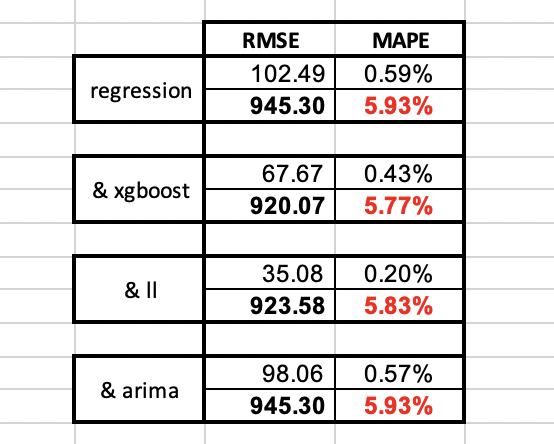